In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [75]:
df = pd.read_csv('rating.csv')
df

,Объект,KKal,Price,proteins,fats,carbohydrates,Стрижов,Гребенькова,Михеев,Тихонов,Панченко,Панкратов,Харь,Савельев,Исламов,Волынцев,Христолюбов,Алсаханова
0,Устрицы,72.0,85.0,9.0,2.0,4.4,4.0,NaN,NaN,NaN,9,5.0,NaN,NaN,NaN,NaN,3.0,9
1,Арахиc соленый,640.0,69.0,25.0,52.0,17.0,2.0,6.0,4.0,8.0,7,4.0,3.0,3.0,NaN,4.0,6.0,3
2,Молоко 2.5%,42.0,5.9,3.4,2.5,5.0,5.0,1.0,5.0,5.0,4,3.0,8.0,4.0,2.0,3.0,5.0,5
3,Макароны,371.0,34.0,3.6,0.4,20.0,7.0,7.0,2.0,3.0,2,8.0,4.0,6.0,3.0,5.0,NaN,6
4,Овсяное молоко 3.2%,250.0,8.0,1.0,3.2,6.5,NaN,2.0,7.0,2.0,6,7.0,5.0,5.0,7.0,NaN,7.0,7
5,Шоколад,545.0,100.0,5.0,33.0,56.5,3.0,4.0,1.0,9.0,5,NaN,1.0,1.0,6.0,6.0,1.0,2
6,"Сырок ""РОСТАГРОЭКСПОРТ""",360.7,35.6,7.7,19.1,39.5,NaN,3.0,3.0,NaN,1,2.0,6.0,2.0,1.0,1.0,2.0,8
7,Кефир 3.2%,57.0,5.9,3.0,3.2,4.0,6.0,5.0,8.0,4.0,8,1.0,7.0,7.0,4.0,7.0,NaN,1
8,Гречневая крупа,334.0,4.0,12.0,2.0,67.0,1.0,8.0,6.0,1.0,3,6.0,2.0,8.0,5.0,2.0,4.0,4


In [76]:
obj = np.array((df['Объект']))
obj[6] = 'Сырок творожный'

### Простые рейтинги
основаны на одном из признаков и правиле tbtb


In [77]:
df['kl'] = [np.where(df.KKal.values.argsort()==i)[0][0]+1 for i in range(9)]
df['P'] = [np.where(df.Price.values.argsort()==i)[0][0]+1 for i in range(9)]
df['prot'] = [np.where(df.proteins.values.argsort()==i)[0][0]+1 for i in range(9)]
df['f'] = [np.where(df.fats.values.argsort()==i)[0][0]+1 for i in range(9)]
df['c'] = [np.where(df.carbohydrates.values.argsort()==i)[0][0]+1 for i in range(9)]
df.iloc[:,6:]

,Стрижов,Гребенькова,Михеев,Тихонов,Панченко,Панкратов,Харь,Савельев,Исламов,Волынцев,Христолюбов,Алсаханова,kl,P,prot,f,c
0,4.0,NaN,NaN,NaN,9,5.0,NaN,NaN,NaN,NaN,3.0,9,3,8,7,2,2
1,2.0,6.0,4.0,8.0,7,4.0,3.0,3.0,NaN,4.0,6.0,3,9,7,9,9,5
2,5.0,1.0,5.0,5.0,4,3.0,8.0,4.0,2.0,3.0,5.0,5,1,2,3,4,3
3,7.0,7.0,2.0,3.0,2,8.0,4.0,6.0,3.0,5.0,NaN,6,7,5,4,1,6
4,NaN,2.0,7.0,2.0,6,7.0,5.0,5.0,7.0,NaN,7.0,7,4,4,1,5,4
5,3.0,4.0,1.0,9.0,5,NaN,1.0,1.0,6.0,6.0,1.0,2,8,9,5,8,8
6,NaN,3.0,3.0,NaN,1,2.0,6.0,2.0,1.0,1.0,2.0,8,6,6,6,7,7
7,6.0,5.0,8.0,4.0,8,1.0,7.0,7.0,4.0,7.0,NaN,1,2,3,2,6,1
8,1.0,8.0,6.0,1.0,3,6.0,2.0,8.0,5.0,2.0,4.0,4,5,1,8,3,9


In [105]:
weights = pd.read_csv('weights.csv')
# матрица оценки весов 
W = weights.values.astype(float)

In [79]:
# Матрица с признаками объектов и оценками экспертов
A = df.iloc[:,6:].values

### Запонение пропусков
Используестся метод ближайших соседей (округленное среднее по 2 ближайшим соседям)

In [80]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)
A_f = np.round(imputer.fit_transform(A[:,:-5].T).T)
A_f = np.concatenate((A[:,-5:], A_f), axis=1)
A = np.concatenate((A[:,-5:], A[:,:-5]), axis=1)

Изменение распределений по экспертам после заполнения пропусков.

2 [ 4.  2.  5.  7. nan  3. nan  6.  1.]
[4. 2. 5. 7. 6. 3. 3. 6. 1.]


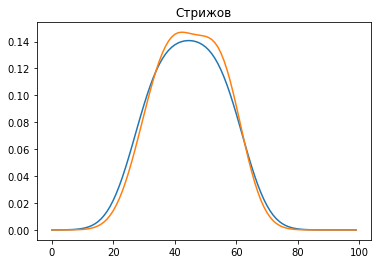

1 [nan  6.  1.  7.  2.  4.  3.  5.  8.]
[6. 6. 1. 7. 2. 4. 3. 5. 8.]


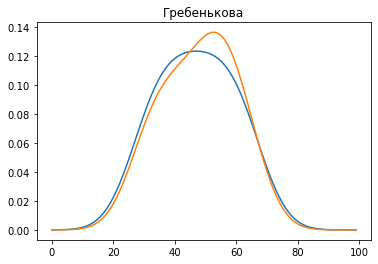

1 [nan  4.  5.  2.  7.  1.  3.  8.  6.]
[5. 4. 5. 2. 7. 1. 3. 8. 6.]


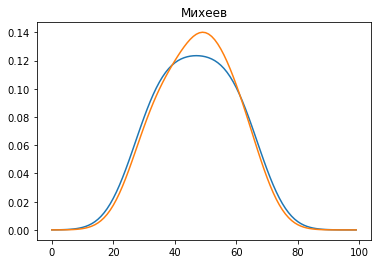

2 [nan  8.  5.  3.  2.  9. nan  4.  1.]
[6. 8. 5. 3. 2. 9. 1. 4. 1.]


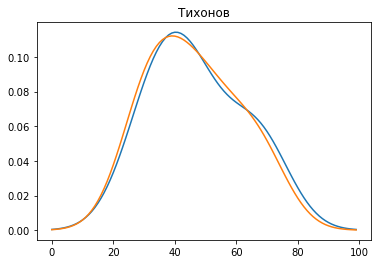

0 [9. 7. 4. 2. 6. 5. 1. 8. 3.]
[9. 7. 4. 2. 6. 5. 1. 8. 3.]


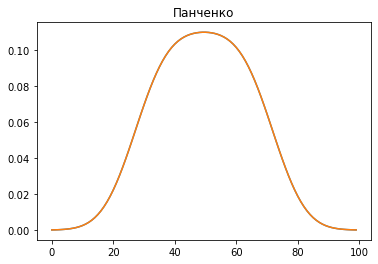

1 [ 5.  4.  3.  8.  7. nan  2.  1.  6.]
[5. 4. 3. 8. 7. 3. 2. 1. 6.]


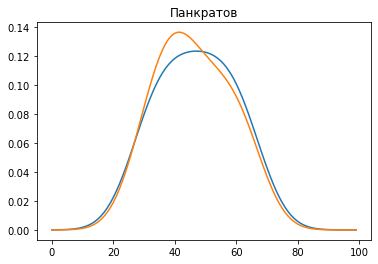

1 [nan  3.  8.  4.  5.  1.  6.  7.  2.]
[5. 3. 8. 4. 5. 1. 6. 7. 2.]


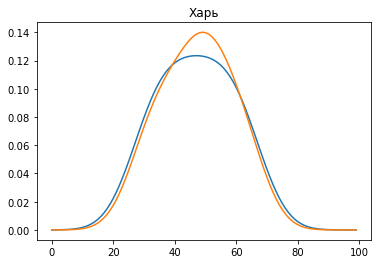

1 [nan  3.  4.  6.  5.  1.  2.  7.  8.]
[6. 3. 4. 6. 5. 1. 2. 7. 8.]


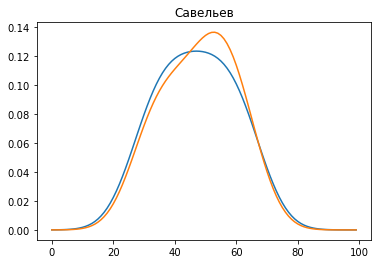

2 [nan nan  2.  3.  7.  6.  1.  4.  5.]
[6. 5. 2. 3. 7. 6. 1. 4. 5.]


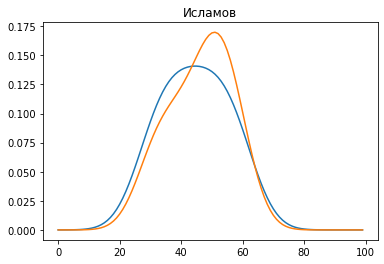

2 [nan  4.  3.  5. nan  6.  1.  7.  2.]
[5. 4. 3. 5. 5. 6. 1. 7. 2.]


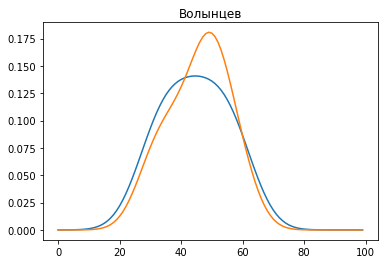

2 [ 3.  6.  5. nan  7.  1.  2. nan  4.]
[3. 6. 5. 5. 7. 1. 2. 5. 4.]


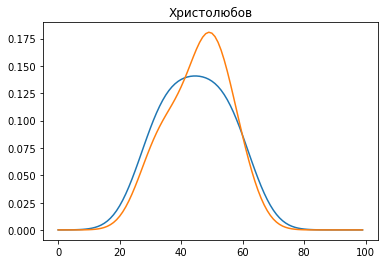

0 [9. 3. 5. 6. 7. 2. 8. 1. 4.]
[9. 3. 5. 6. 7. 2. 8. 1. 4.]


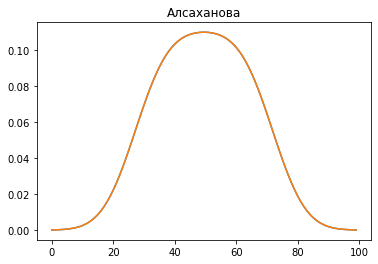

In [81]:
import scipy
from scipy.stats import entropy

entropies = []
for i in range(12):
    a = A[:,i+5]
    print(len(a[np.isnan(a)]),a)
    density_not_na = scipy.stats.gaussian_kde(a[~np.isnan(a)])
    xs = np.linspace(-5,15,100)
    dx = density_not_na(xs)
    plt.plot(dx)

    a_f = A_f[:,i+5]
    print(a_f)
    density_not_na = scipy.stats.gaussian_kde(a_f[~np.isnan(a_f)])
    ys = np.linspace(-5,15,100)
    dy = density_not_na(ys)
    plt.plot(dy)
    plt.title(df.columns[6+i])
    plt.show()
    entropies.append(entropy(pk=dx, qk=dy))

In [98]:
print('{0:20} {1}'.format("Эксперт", "Энтропия"))
for i in range(12):
    print('{0:20} {1}'.format(df.columns[6+i], entropies[i]))

Эксперт              Энтропия
Стрижов              0.009168442482869011
Гребенькова          0.0062451512929731536
Михеев               0.006859827168509419
Тихонов              0.00492890903567493
Панченко             0.0
Панкратов            0.0062451613644641125
Харь                 0.006859827168509453
Савельев             0.006245151292973505
Исламов              0.023657422869393013
Волынцев             0.029816707761721194
Христолюбов          0.029816707761721007
Алсаханова           0.0


Изменение распределений по продуктам после заполнения пропусков.

7 [ 3.  8.  7.  2.  2.  4. nan nan nan  9.  5. nan nan nan nan  3.  9.]
[3. 8. 7. 2. 2. 4. 6. 5. 6. 9. 5. 5. 6. 6. 5. 3. 9.]


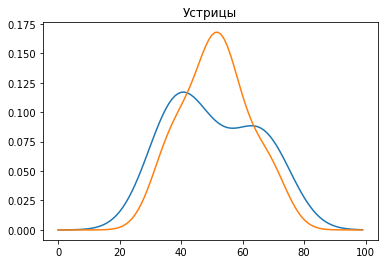

1 [ 9.  7.  9.  9.  5.  2.  6.  4.  8.  7.  4.  3.  3. nan  4.  6.  3.]
[9. 7. 9. 9. 5. 2. 6. 4. 8. 7. 4. 3. 3. 5. 4. 6. 3.]


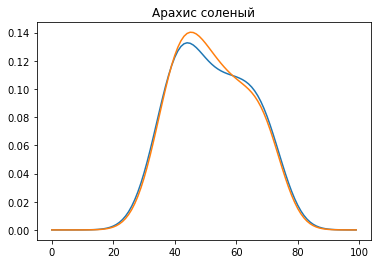

0 [1. 2. 3. 4. 3. 5. 1. 5. 5. 4. 3. 8. 4. 2. 3. 5. 5.]
[1. 2. 3. 4. 3. 5. 1. 5. 5. 4. 3. 8. 4. 2. 3. 5. 5.]


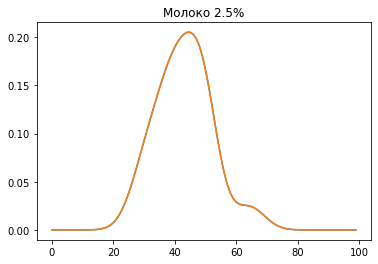

1 [ 7.  5.  4.  1.  6.  7.  7.  2.  3.  2.  8.  4.  6.  3.  5. nan  6.]
[7. 5. 4. 1. 6. 7. 7. 2. 3. 2. 8. 4. 6. 3. 5. 5. 6.]


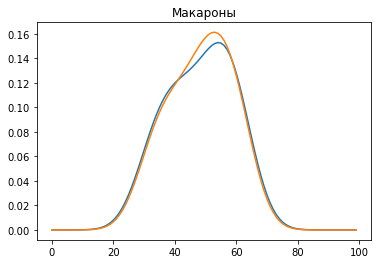

2 [ 4.  4.  1.  5.  4. nan  2.  7.  2.  6.  7.  5.  5.  7. nan  7.  7.]
[4. 4. 1. 5. 4. 6. 2. 7. 2. 6. 7. 5. 5. 7. 5. 7. 7.]


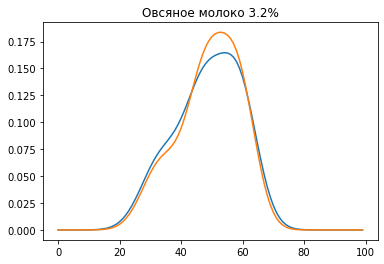

1 [ 8.  9.  5.  8.  8.  3.  4.  1.  9.  5. nan  1.  1.  6.  6.  1.  2.]
[8. 9. 5. 8. 8. 3. 4. 1. 9. 5. 3. 1. 1. 6. 6. 1. 2.]


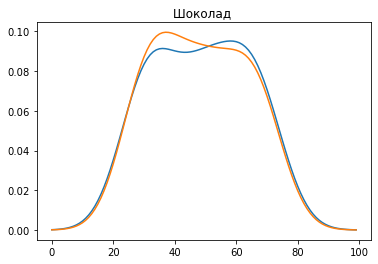

2 [ 6.  6.  6.  7.  7. nan  3.  3. nan  1.  2.  6.  2.  1.  1.  2.  8.]
[6. 6. 6. 7. 7. 3. 3. 3. 1. 1. 2. 6. 2. 1. 1. 2. 8.]


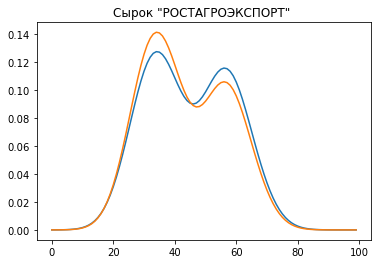

1 [ 2.  3.  2.  6.  1.  6.  5.  8.  4.  8.  1.  7.  7.  4.  7. nan  1.]
[2. 3. 2. 6. 1. 6. 5. 8. 4. 8. 1. 7. 7. 4. 7. 5. 1.]


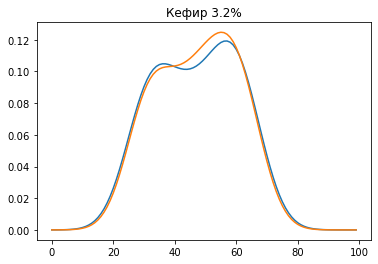

0 [5. 1. 8. 3. 9. 1. 8. 6. 1. 3. 6. 2. 8. 5. 2. 4. 4.]
[5. 1. 8. 3. 9. 1. 8. 6. 1. 3. 6. 2. 8. 5. 2. 4. 4.]


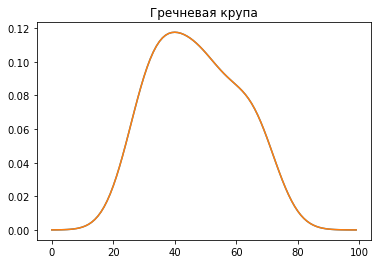

In [100]:
food_entropies = []
for i in range(9):
    a = A[i,:]
    print(len(a[np.isnan(a)]),a)
    density_not_na = scipy.stats.gaussian_kde(a[~np.isnan(a)])
    xs = np.linspace(-5,15,100)
    dx = density_not_na(xs)
    plt.plot(dx)

    a_f = A_f[i,:]
    print(a_f)
    density_not_na = scipy.stats.gaussian_kde(a_f[~np.isnan(a_f)])
    ys = np.linspace(-5,15,100)
    dy = density_not_na(ys)
    plt.plot(dy)
    plt.title(df.iloc[i,0])
    plt.show()
    food_entropies.append(entropy(dx,dy))

In [101]:
print('{0:25} {1}'.format("Продукт", "Энтропия"))
for i in range(9):
    print('{0:25} {1}'.format(df.iloc[i,0],food_entropies[i]))

Продукт                   Энтропия
Устрицы                   0.15226913333838
Арахиc соленый            0.001954470829610639
Молоко 2.5%               0.0
Макароны                  0.0018542744052332284
Овсяное молоко 3.2%       0.006573276766626956
Шоколад                   0.001973048215447996
Сырок "РОСТАГРОЭКСПОРТ"   0.004690279326131697
Кефир 3.2%                0.0020577791921143323
Гречневая крупа           0.0


In [106]:
imputer = KNNImputer(n_neighbors=2)
W_f = np.round(imputer.fit_transform(W.T).T)

3 пропусков
[ 6.  7.  8.  9.  5.  2. nan  2.  2.  2.  2. nan  4.  6.  2.  2. nan]
[6. 7. 8. 9. 5. 2. 4. 2. 2. 2. 2. 5. 4. 6. 2. 2. 2.]


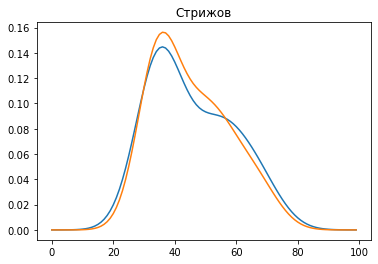

0 пропусков
[ 3.  8.  9.  7.  5.  5. 10.  3.  3.  3.  3. 10. 10. 10.  3.  3.  3.]
[ 3.  8.  9.  7.  5.  5. 10.  3.  3.  3.  3. 10. 10. 10.  3.  3.  3.]


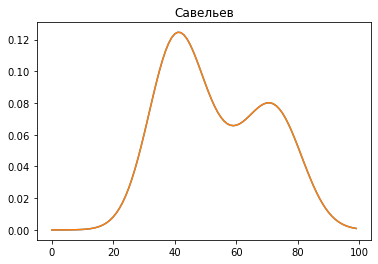

0 пропусков
[ 9.  9.  9.  9.  9.  1.  9.  1.  1.  1. 10. 10. 10. 10.  1. 10.  1.]
[ 9.  9.  9.  9.  9.  1.  9.  1.  1.  1. 10. 10. 10. 10.  1. 10.  1.]


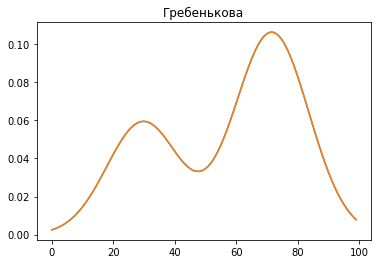

0 пропусков
[ 3.  6.  5.  7.  7. 10.  3. 10.  2.  8.  3.  4. 10.  6.  1.  1.  1.]
[ 3.  6.  5.  7.  7. 10.  3. 10.  2.  8.  3.  4. 10.  6.  1.  1.  1.]


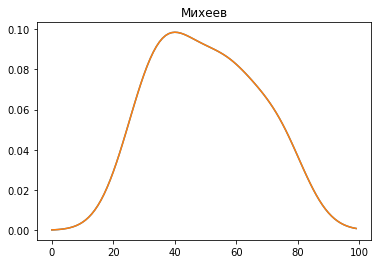

0 пропусков
[10.  4.  6.  1.  8.  8.  5.  3.  5.  4.  9.  4.  2.  1.  4.  4.  9.]
[10.  4.  6.  1.  8.  8.  5.  3.  5.  4.  9.  4.  2.  1.  4.  4.  9.]


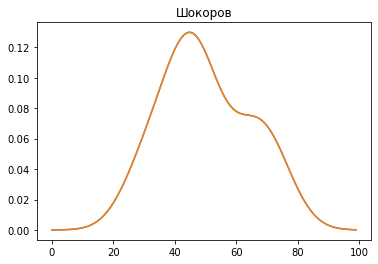

0 пропусков
[7. 8. 9. 5. 6. 5. 5. 5. 5. 6. 5. 5. 5. 5. 5. 5. 5.]
[7. 8. 9. 5. 6. 5. 5. 5. 5. 6. 5. 5. 5. 5. 5. 5. 5.]


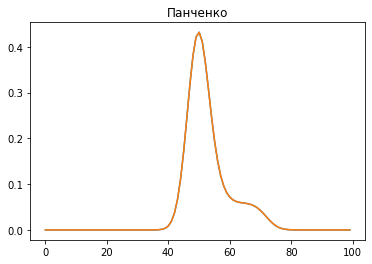

0 пропусков
[ 7.  8. 10.  9.  6.  5.  4.  5.  4.  5.  4.  5.  4.  5.  4.  5.  4.]
[ 7.  8. 10.  9.  6.  5.  4.  5.  4.  5.  4.  5.  4.  5.  4.  5.  4.]


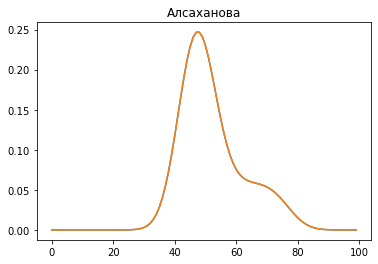

2 пропусков
[10. 10.  7.  9.  6. nan  5.  1.  1.  1. nan  5.  5.  5.  1.  5.  1.]
[10. 10.  7.  9.  6.  4.  5.  1.  1.  1.  3.  5.  5.  5.  1.  5.  1.]


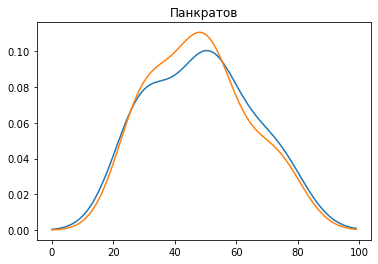

0 пропусков
[ 1. 10. 10.  2.  3.  4. 10.  6.  7.  8.  9. 10. 10. 10.  9.  8.  7.]
[ 1. 10. 10.  2.  3.  4. 10.  6.  7.  8.  9. 10. 10. 10.  9.  8.  7.]


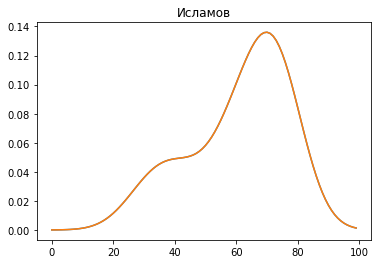

0 пропусков
[10. 10. 10. 10. 10.  3.  5.  4.  5.  7.  7.  5.  6.  8. 10.  5.  4.]
[10. 10. 10. 10. 10.  3.  5.  4.  5.  7.  7.  5.  6.  8. 10.  5.  4.]


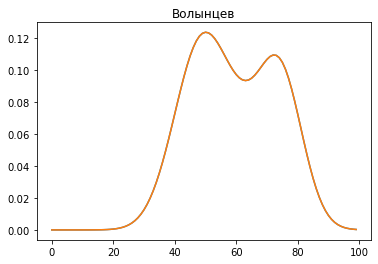

0 пропусков
[10. 10. 10. 10. 10.  7.  8.  7.  7.  5.  5.  5.  7.  8.  7.  6.  5.]
[10. 10. 10. 10. 10.  7.  8.  7.  7.  5.  5.  5.  7.  8.  7.  6.  5.]


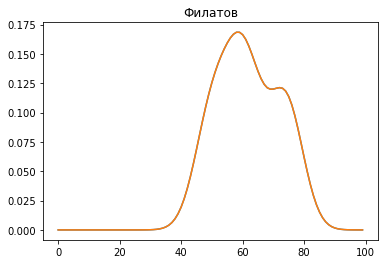

0 пропусков
[8. 3. 7. 7. 7. 4. 5. 6. 4. 5. 6. 4. 5. 6. 4. 5. 6.]
[8. 3. 7. 7. 7. 4. 5. 6. 4. 5. 6. 4. 5. 6. 4. 5. 6.]


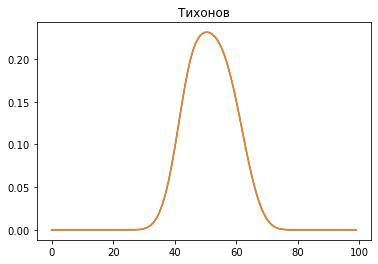

0 пропусков
[10. 10.  9.  9.  9.  3. 10.  3.  3.  3.  3. 10. 10. 10.  3.  3.  3.]
[10. 10.  9.  9.  9.  3. 10.  3.  3.  3.  3. 10. 10. 10.  3.  3.  3.]


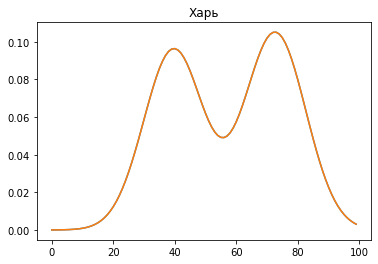

0 пропусков
[10. 10. 10. 10. 10.  8.  8.  5.  5.  5.  5.  7.  7. 10.  5.  7.  5.]
[10. 10. 10. 10. 10.  8.  8.  5.  5.  5.  5.  7.  7. 10.  5.  7.  5.]


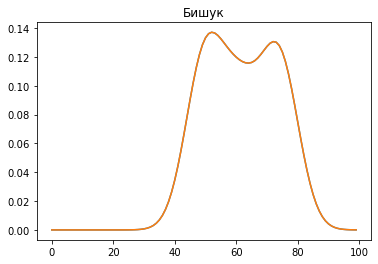

0 пропусков
[10. 10. 10. 10.  9.  8.  8.  5.  5.  5.  6.  7.  8.  9.  8.  7.  5.]
[10. 10. 10. 10.  9.  8.  8.  5.  5.  5.  6.  7.  8.  9.  8.  7.  5.]


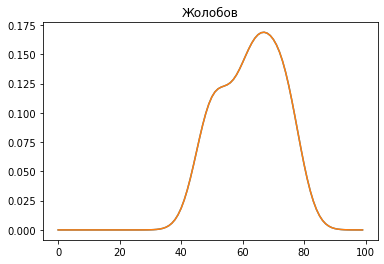

0 пропусков
[ 8. 10.  8. 10.  8.  8. 10.  7.  5. 10.  3.  7.  3.  4. 10.  6.  7.]
[ 8. 10.  8. 10.  8.  8. 10.  7.  5. 10.  3.  7.  3.  4. 10.  6.  7.]


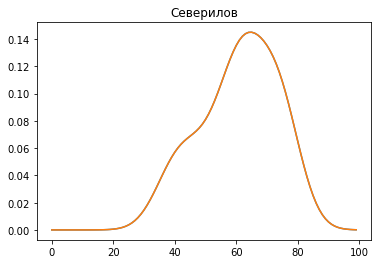

0 пропусков
[10. 10. 10. 10. 10.  7.  6.  4.  4.  4.  5.  7.  7.  9.  5.  7.  4.]
[10. 10. 10. 10. 10.  7.  6.  4.  4.  4.  5.  7.  7.  9.  5.  7.  4.]


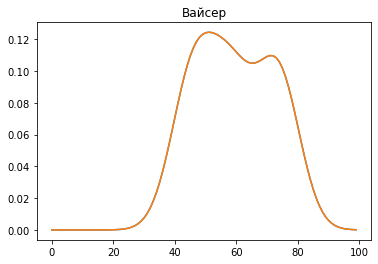

0 пропусков
[10. 10. 10. 10. 10.  8.  8.  8.  5.  5.  5.  7.  7.  9.  8.  7.  7.]
[10. 10. 10. 10. 10.  8.  8.  8.  5.  5.  5.  7.  7.  9.  8.  7.  7.]


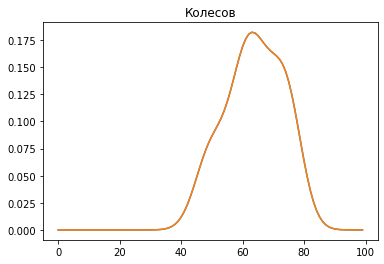

In [109]:
w_entropies = []
for i in range(18):
    w = W[:,i]
    print('{} пропусков'.format(len(w[np.isnan(w)])))
    print(w)
    density_not_na = scipy.stats.gaussian_kde(w[~np.isnan(w)])
    xs = np.linspace(-5,15,100)
    dx = density_not_na(xs)
    plt.plot(dx)

    w_f = W_f[:,i]
    print(w_f)
    density_not_na = scipy.stats.gaussian_kde(w_f[~np.isnan(w_f)])
    ys = np.linspace(-5,15,100)
    dy = density_not_na(ys)
    plt.plot(dy)
    plt.title(weights.columns[i])
    plt.show()
    w_entropies.append(entropy(dx,dy))

In [111]:
print('{0:25} {1}'.format("Эксперт", "Энтропия (распределения весов)"))
for i in range(18):
    if w_entropies[i] != 0.:
        print('{0:25} {1}'.format(weights.columns[i],w_entropies[i]))

Эксперт                   Энтропия (распределения весов)
Стрижов                   0.010401940400794455
Панкратов                 0.0073897613009848585


Text(0.5, 0, 'median')

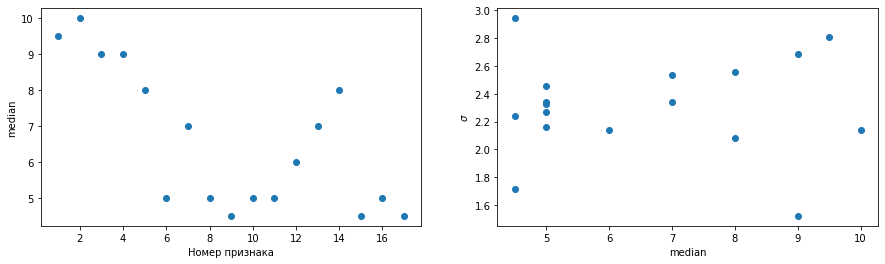

In [118]:
std_w = W_f.std(axis=1)
mean_w = np.median(W_f,axis=1)
fig,ax = plt.subplots(1,2,figsize=(15,4))
ax[0].scatter(np.arange(1,18), mean_w,label='mean')
ax[0].set_xlabel(r'Номер признака')
ax[0].set_ylabel(r'median')
ax[1].scatter(mean_w, std_w,label='std')
ax[1].set_ylabel(r'$\sigma$')
ax[1].set_xlabel(r'median')

Text(0.5, 0, 'median')

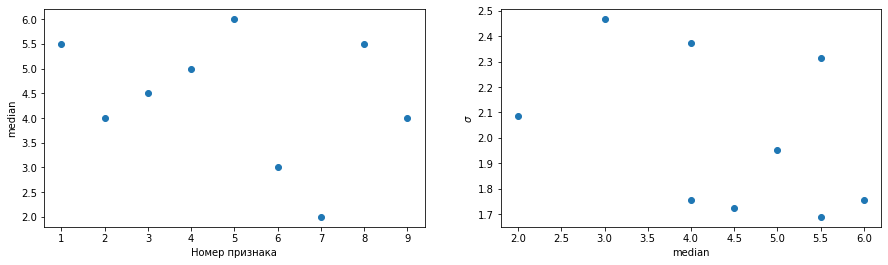

In [119]:
std_q = A_f[:,5:].std(axis=1)
mean_q = np.median(A_f[:,5:],axis=1)
fig,ax = plt.subplots(1,2,figsize=(15,4))
ax[0].scatter(np.arange(1,10), mean_q,label='mean')
ax[0].set_xlabel(r'Номер признака')
ax[0].set_ylabel(r'median')
ax[1].scatter(mean_q, std_q,label='std')
ax[1].set_ylabel(r'$\sigma$')
ax[1].set_xlabel(r'median')

### Линейное согласование

Функция линейного согласования, основанная на формулах:
$$ q_\alpha = \alpha q_0 + (1 − \alpha) A w_0 $$ 
$$ w_\alpha = (1 − \alpha) w_0 + \alpha A^+q_0 $$
Где $\alpha \in [0,1]$ - параметр доверия экспертным оценкам объектов, либо весов. При $\alpha = 0$ мы игнорируем экспертные оценки объектов, при $\alpha = 1$ мы игнорируем экспертные оценки весов.

In [115]:
def lin_agreement(A,q0,w0,alpha):
    A_inv = np.linalg.pinv(A)
    q_a = alpha*q0 + (1 - alpha)*A@w0 
    #q_a = np.array([np.where(q_a.argsort()==i)[0][0]+1 for i in range(9)])
    w_a = (1 - alpha)*w0 + alpha*A_inv@q0
    return q_a, w_a

#### Подбор $\alpha$
$$Q_\alpha = \frac{1}{n} \| w_\alpha - w_0 \|^2_2 + \frac{1}{m} \| q_\alpha - q_0 \|^2_2$$
$$\alpha^* = arg \min_{\alpha} \bigl\{ Q_\alpha \bigl\}$$

In [120]:
q_mean = np.array([np.where(mean_q.argsort()==i)[0][0]+1 for i in range(9)])
e,d = [],[]
for alpha in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]:
    q_a,w_a = lin_agreement(A_f,q_mean,mean_w/np.sum(mean_w),alpha)
    e.append(sum((q_mean-q_a)**2)/q_a.shape[0])
    d.append(sum((mean_w/np.sum(mean_w)-w_a)**2)/w_a.shape[0])

In [121]:
e,d = np.array(e),np.array(d)
alpha = ((e-d).argmin()+1)/10
q_a,w_a = lin_agreement(A_f,q_mean,mean_w/np.sum(mean_w),alpha)
w_a

array([-0.02706929,  0.02533743, -0.15572435, -0.04485432, -0.06461514,
        0.1794354 ,  0.03696965,  0.1607289 , -0.04861513,  0.15954585,
        0.15332735,  0.04854502,  0.15775318,  0.1811819 ,  0.17325399,
        0.12912333,  0.07250966])

In [122]:
q_ar = np.array([np.where(q_a.argsort()==i)[0][0]+1 for i in range(9)])
q_ar

array([7, 3, 5, 6, 9, 2, 1, 8, 4], dtype=int64)

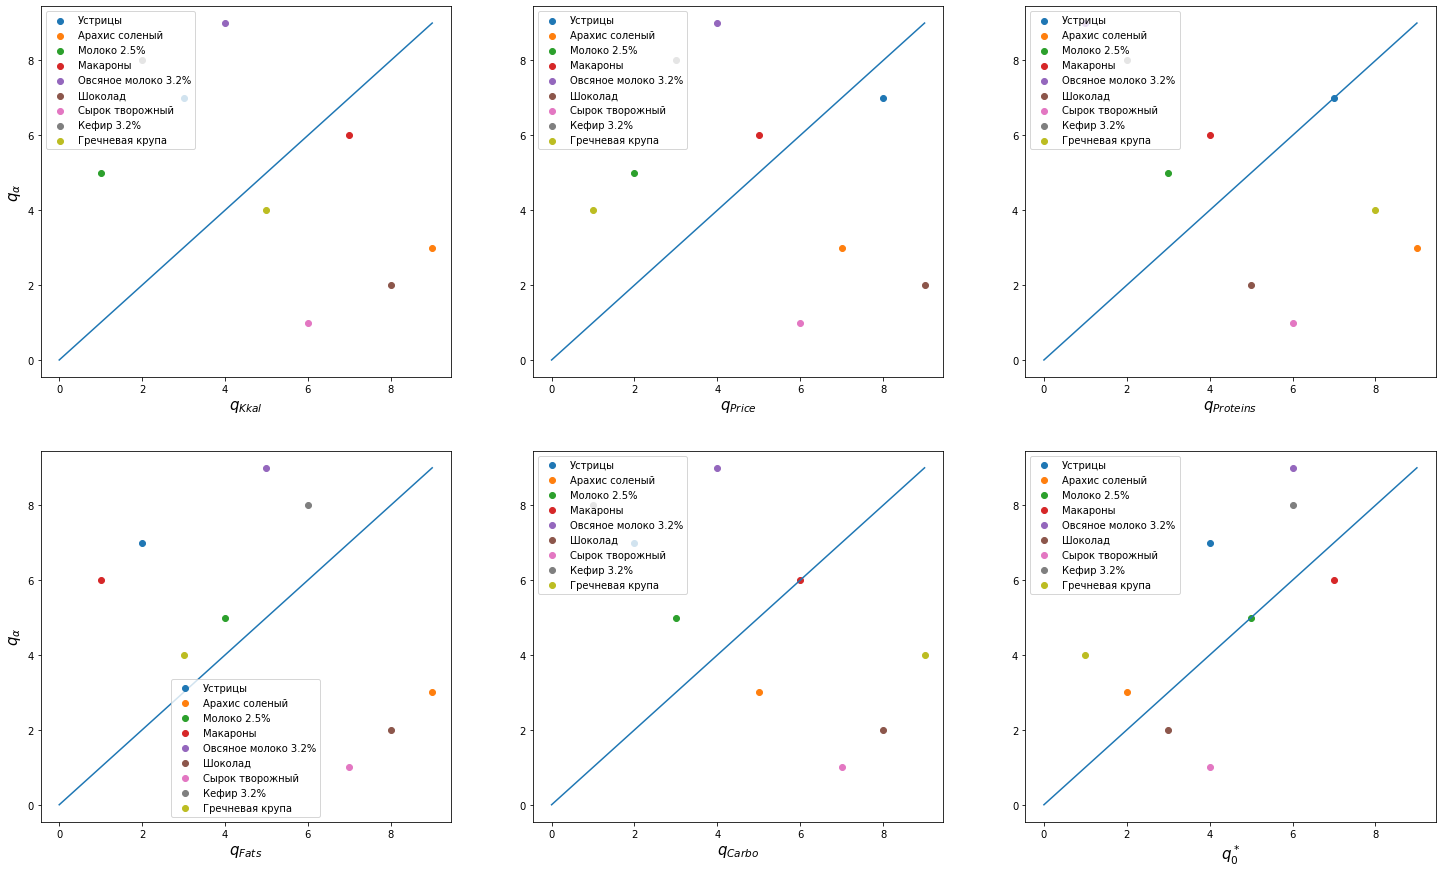

In [171]:
fig,ax = plt.subplots(2,3,figsize=(25,15))
labels = [[r'$q_{Kkal}$',r'$q_{Price}$',r'$q_{Proteins}$'],[r'$q_{Fats}$',r'$q_{Carbo}$',r'$q^*_{0}$']]
for i in range(2):
    for j in range(3):
        for k in range(9):
            ax[i,j].scatter(A[:,i*3+j][k],q_ar[k],label=obj[k])
        ax[i,j].legend()
        ax[i,j].plot([0,9],[0,9])
        ax[i,j].set_xlabel(labels[i][j],size=15)
    ax[i,0].set_ylabel(r'$q_{\alpha}$',size=15)

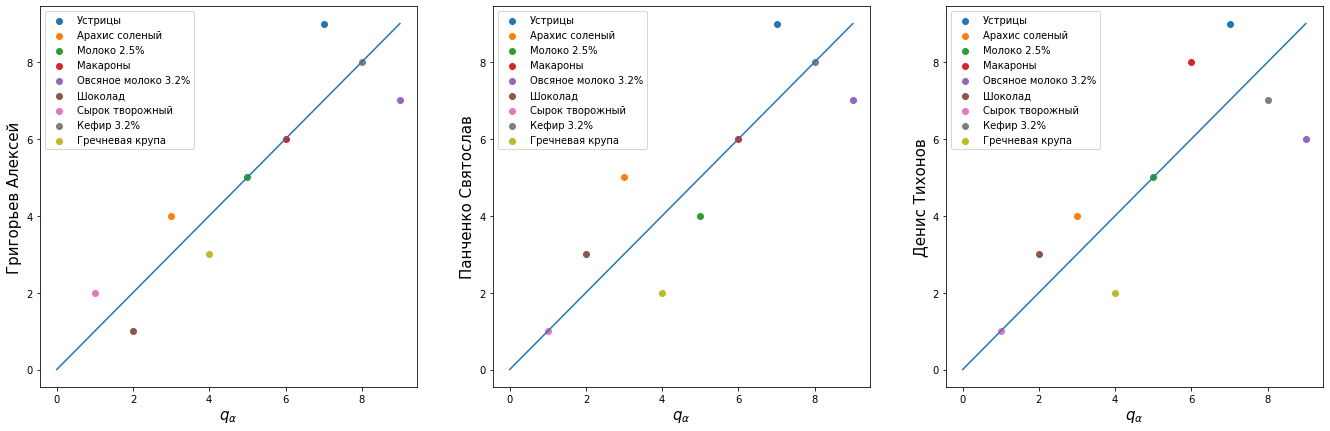

In [124]:
from matplotlib.backends.backend_pdf import PdfPages
q = [[9,4,5,6,7,1,2,8,3], [9,5,4,6,7,3,1,8,2], [9, 4, 5, 8, 6, 3, 1, 7, 2]]
names = ['Григорьев Алексей','Панченко Святослав', 'Денис Тихонов']
fig,ax = plt.subplots(1,3,figsize=(23,7))
with PdfPages('Rating1.pdf') as pdf:
    for i in range(3):
        for k in range(9):
            ax[i].scatter(q_ar[k],q[i][k],label=obj[k])
        ax[i].legend()
        ax[i].plot([0,9],[0,9])
        ax[i].set_ylabel(names[i],size=15)
        ax[i].set_xlabel(r'$q_{\alpha}$',size=15)
    pdf.savefig()

# Учет предпочтения экспертов
Пусть у нас есть свое предпочтение экспертов. 

In [131]:
r_exp = np.array([ 1,  9, 10,  3,  8,  7,  5, 12,  6,  2, 11,  4]) # ранжирование экспертов, ниже значение - лучше эксперт
# поменяем порядок для следующего шага
r_exp = np.array([abs(np.where(r_exp.argsort()==i)[0][0]-11) for i in range(12)]) # ранжирование экспертов, выше значение - лучше эксперт 

Чтобы учесть данный рейтиг экспертов, предлагается считать медиану, расширяя матрицы признаков и весов, то есть оценки экспертов использовать как число столбцов для этого эксперта. То есть повторяющиеся столбцы. Например, для эксперта с рейтингом 5, в матрице оценок весов и матрице оценок объектов будет 5 одинаковых столбцов. Взятие медианы по таким матрицам давало бы  'взвешанное среднее' с учетом того, что мы работаем в не линейных шкалах.

In [136]:
A_p, W_p = A_f.copy(),W_f.copy()
for i in range(12):
    if r_exp[i] > 0:
        for j in range(r_exp[i]):
            A_p = np.concatenate((A_p,A_f[:,5+i:6+i]),axis=1)
            try:
                W_p = np.concatenate((W_p,weights[df.columns[6+i]].values[...,None]),axis=1)
            except KeyError:
                print('No ', df.columns[6+i])
                break

No  Христолюбов


In [137]:
imputer = KNNImputer(n_neighbors=2)
W_p = np.round(imputer.fit_transform(W_p.T).T)

Text(0.5, 0, 'mean')

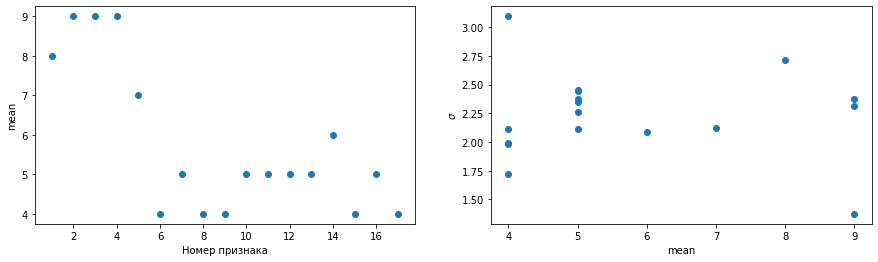

In [138]:
std_w = W_p.std(axis=1)
mean_w_p = np.median(W_p,axis=1)
fig,ax = plt.subplots(1,2,figsize=(15,4))
ax[0].scatter(np.arange(1,18), mean_w_p,label='mean')
ax[0].set_xlabel(r'Номер признака')
ax[0].set_ylabel(r'mean')
ax[1].scatter(mean_w_p, std_w,label='std')
ax[1].set_ylabel(r'$\sigma$')
ax[1].set_xlabel(r'mean')

Text(0.5, 0, 'mean')

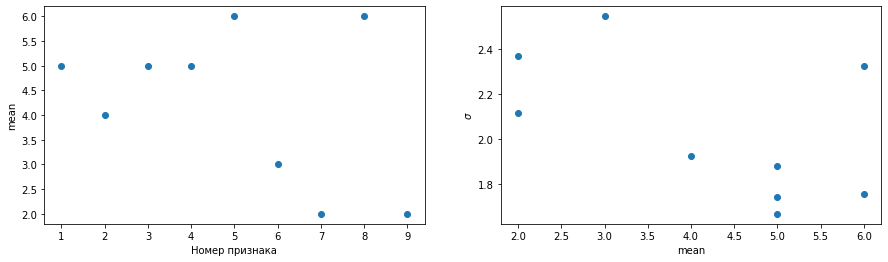

In [139]:
std_q = A_p[:,5:].std(axis=1)
mean_q = np.median(A_p[:,5:],axis=1)
fig,ax = plt.subplots(1,2,figsize=(15,4))
ax[0].scatter(np.arange(1,10), mean_q,label='mean')
ax[0].set_xlabel(r'Номер признака')
ax[0].set_ylabel(r'mean')
ax[1].scatter(mean_q, std_q,label='std')
ax[1].set_ylabel(r'$\sigma$')
ax[1].set_xlabel(r'mean')

In [142]:
q_mean = np.array([np.where(mean_q.argsort()==i)[0][0]+1 for i in range(9)])
e,d = [],[]
for alpha in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]:
    q_a_p,w_a_p = lin_agreement(A_f,q_mean,mean_w_p/np.sum(mean_w_p),alpha)
    e.append(sum((q_mean-q_a_p)**2)/q_a.shape[0])
    d.append(sum((mean_w_p/np.sum(mean_w_p)-w_a_p)**2)/w_a_p.shape[0])

In [143]:
e,d = np.array(e),np.array(d)
alpha = ((e-d).argmin()+1)/10
q_a_p,w_a_p = lin_agreement(A_f,q_mean,mean_w_p/np.sum(mean_w_p),alpha)
w_a_p

array([ 0.07581468,  0.00233866, -0.18557044,  0.01012322, -0.09994484,
        0.32069466,  0.04977622,  0.05887939,  0.08418771,  0.06814129,
        0.13156519,  0.1581259 ,  0.11616556,  0.00615315,  0.22863022,
        0.23582697, -0.08308985])

In [144]:
q_a_pr = np.array([np.where(q_a_p.argsort()==i)[0][0]+1 for i in range(9)])
q_a_pr

array([5, 4, 6, 7, 8, 3, 1, 9, 2], dtype=int64)

Text(0, 0.5, '$q_{0}$')

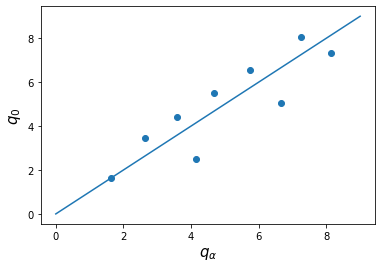

In [145]:
plt.scatter(q_a,q_a_p)
plt.plot([0,9],[0,9])
plt.xlabel(r'$q_{\alpha}$',size=15)
plt.ylabel(r'$q_{0}$',size=15)

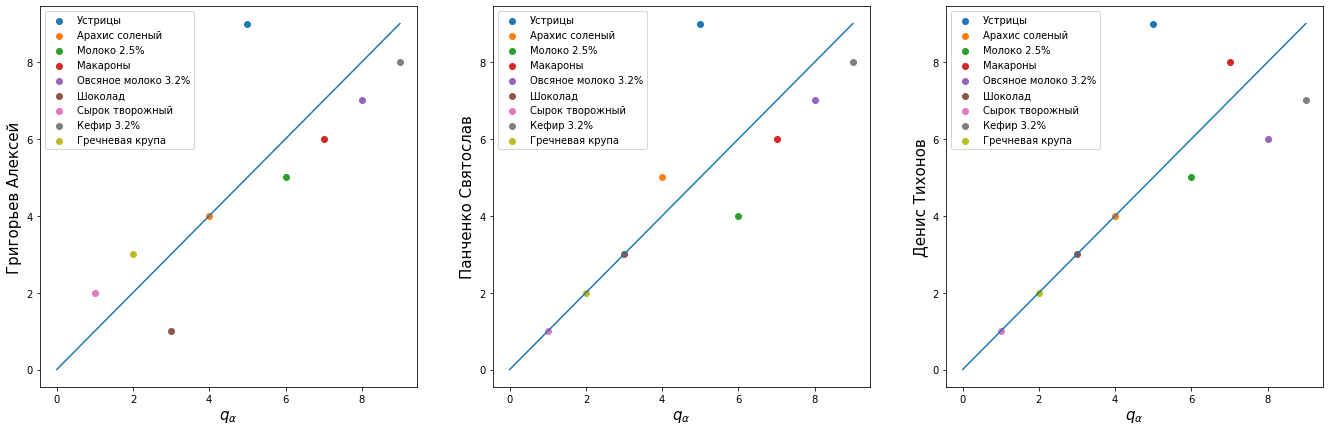

In [146]:
q = [[9,4,5,6,7,1,2,8,3], [9,5,4,6,7,3,1,8,2], [9, 4, 5, 8, 6, 3, 1, 7, 2]]
names = ['Григорьев Алексей','Панченко Святослав', 'Денис Тихонов']
fig,ax = plt.subplots(1,3,figsize=(23,7))
with PdfPages('Rating2.pdf') as pdf:
    for i in range(3):
        for k in range(9):
            ax[i].scatter(q_a_pr[k],q[i][k],label=obj[k])
        ax[i].legend()
        ax[i].plot([0,9],[0,9])
        ax[i].set_ylabel(names[i],size=15)
        ax[i].set_xlabel(r'$q_{\alpha}$',size=15)
    pdf.savefig()

### Сравнение результатов до и после учета рейтинга экспертов

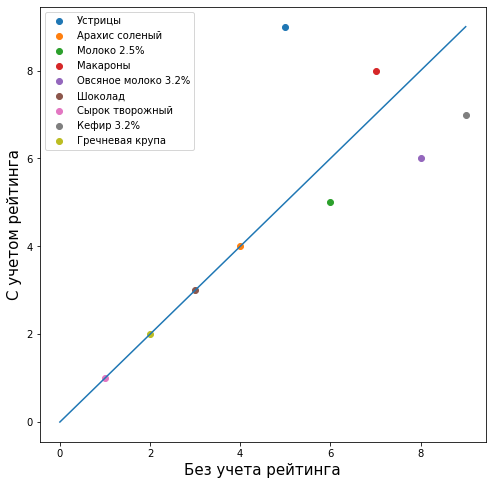

In [147]:
fig,ax = plt.subplots(1,1,figsize=(8,8))
with PdfPages('rating_ch.pdf') as pdf:
    for k in range(9):
        ax.scatter(q_a_pr[k],q[i][k],label=obj[k])
    ax.legend()
    ax.plot([0,9],[0,9])
    ax.set_xlabel('Без учета рейтинга',size=15)
    ax.set_ylabel(r'С учетом рейтинга',size=15)
    pdf.savefig()

Посмотрим, как изменилась величина $Q_\alpha$ для различных экспертов в зависимости от их рейтинга.

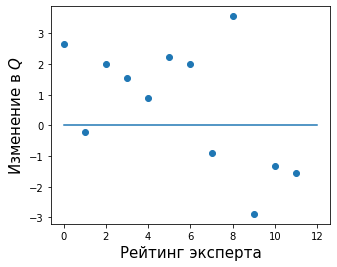

In [149]:
change= []
for i in range(12):
    Q = sum((A_f[:,5+i]-q_ar)**2)/q_a.shape[0] + sum((mean_w/np.sum(mean_w)-w_a)**2)/w_a.shape[0]
    Q_p = sum((A_f[:,5+i]-q_a_pr)**2)/q_a_p.shape[0] + sum((mean_w_p/np.sum(mean_w_p)-w_a_p)**2)/w_a_p.shape[0]
    change.append(Q_p-Q)
fig,ax = plt.subplots(1,1,figsize=(5,4))
with PdfPages('Q_ch.pdf') as pdf:
    ax.scatter(r_exp,change)
    ax.plot([0,12],[0,0])
    ax.set_xlabel('Рейтинг эксперта',size=15)
    ax.set_ylabel(r'Изменение в $Q$',size=15)
    pdf.savefig()


Видно, что почти для всех экспертов с рейтингом ниже 7 изменения положительны, то есть $q_\alpha$ отдалилось от оценки этих экспертов после учета рейтинга. Для экспертов с рейтингом не ниже 7 изменения отрицательны.  